In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("cars.csv")

In [3]:
df.head()

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111,21,27,13495
1,3,?,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111,21,27,16500
2,1,?,alfa-romero,gas,hatchback,rwd,front,65.5,52.4,ohcv,152,154,19,26,16500
3,2,164,audi,gas,sedan,fwd,front,66.2,54.3,ohc,109,102,24,30,13950
4,2,164,audi,gas,sedan,4wd,front,66.4,54.3,ohc,136,115,18,22,17450


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   body-style         205 non-null    object 
 5   drive-wheels       205 non-null    object 
 6   engine-location    205 non-null    object 
 7   width              205 non-null    float64
 8   height             205 non-null    float64
 9   engine-type        205 non-null    object 
 10  engine-size        205 non-null    int64  
 11  horsepower         205 non-null    object 
 12  city-mpg           205 non-null    int64  
 13  highway-mpg        205 non-null    int64  
 14  price              205 non-null    int64  
dtypes: float64(2), int64(5), object(8)
memory usage: 24.1+ KB


# Handling Null Values

In [5]:
miss_vals =["Nan","?","missing"] 
df.replace(miss_vals,np.NaN,inplace=True)

In [6]:
df.isna().sum()

symboling             0
normalized-losses    41
make                  0
fuel-type             0
body-style            0
drive-wheels          0
engine-location       0
width                 0
height                0
engine-type           0
engine-size           0
horsepower            2
city-mpg              0
highway-mpg           0
price                 0
dtype: int64

In [7]:
df['normalized-losses'] = df['normalized-losses'].astype("float64")
df['horsepower'] = df['horsepower'].astype("float64")

In [8]:
df['normalized-losses'].replace(np.NaN,df['normalized-losses'].mean(),inplace=True)
df['horsepower'].replace(np.NaN,df['horsepower'].mean(),inplace=True)

In [9]:
df.isna().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
body-style           0
drive-wheels         0
engine-location      0
width                0
height               0
engine-type          0
engine-size          0
horsepower           0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

# Handling Outliers

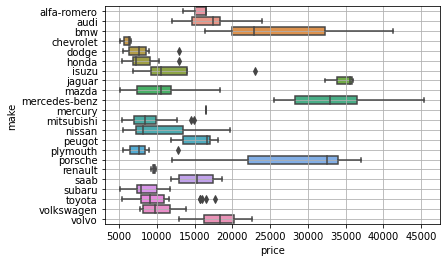

In [10]:
sns.boxplot(data = df,x='price',y="make")
plt.grid()
plt.show()

In [11]:
df[(df.make == "dodge") & (df.price >12000)]


,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
29,3,145.0,dodge,gas,hatchback,fwd,front,66.3,50.2,ohc,156,145.0,19,24,12964


In [12]:
df[(df['make'] == 'toyota') & (df['price'] > 14000)]

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
172,2,134.0,toyota,gas,convertible,rwd,front,65.6,53.0,ohc,146,116.0,24,30,17669
178,3,197.0,toyota,gas,hatchback,rwd,front,67.7,52.0,dohc,171,161.0,20,24,16558
179,3,197.0,toyota,gas,hatchback,rwd,front,67.7,52.0,dohc,171,161.0,19,24,15998
180,-1,90.0,toyota,gas,sedan,rwd,front,66.5,54.1,dohc,171,156.0,20,24,15690
181,-1,122.0,toyota,gas,wagon,rwd,front,66.5,54.1,dohc,161,156.0,19,24,15750


In [13]:
df[(df['make'] == 'honda') & (df['price'] > 12000)]

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
41,0,85.0,honda,gas,sedan,fwd,front,65.2,54.1,ohc,110,101.0,24,28,12945


In [14]:
df[(df['make'] == 'isuzu') & (df['price'] > 20000)]

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
45,0,122.0,isuzu,gas,sedan,fwd,front,63.6,52.0,ohc,90,70.0,38,43,23000


In [15]:
df[(df['make'] == 'mitsubishi') & (df['price'] > 14000)]

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
83,3,122.0,mitsubishi,gas,hatchback,fwd,front,66.3,50.2,ohc,156,145.0,19,24,14869
84,3,122.0,mitsubishi,gas,hatchback,fwd,front,66.3,50.2,ohc,156,145.0,19,24,14489


In [16]:
df[(df['make'] == 'plymouth') & (df['price'] > 10000)]

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
124,3,122.0,plymouth,gas,hatchback,rwd,front,66.3,50.2,ohc,156,145.0,19,24,12764


In [17]:
df.drop([29,41,45,83,84,124,172,178,179,180,181],axis=0,inplace=True)

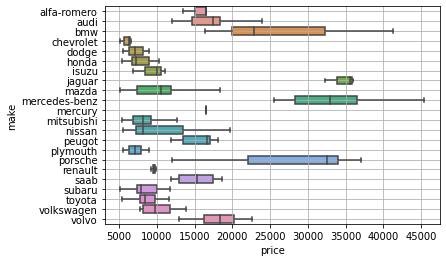

In [18]:
sns.boxplot(data = df,x='price',y="make")
plt.grid()
plt.show()

In [19]:
df.head()

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
0,3,122.0,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111.0,21,27,13495
1,3,122.0,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111.0,21,27,16500
2,1,122.0,alfa-romero,gas,hatchback,rwd,front,65.5,52.4,ohcv,152,154.0,19,26,16500
3,2,164.0,audi,gas,sedan,fwd,front,66.2,54.3,ohc,109,102.0,24,30,13950
4,2,164.0,audi,gas,sedan,4wd,front,66.4,54.3,ohc,136,115.0,18,22,17450


In [20]:
df.describe()

,symboling,normalized-losses,width,height,engine-size,horsepower,city-mpg,highway-mpg,price
count,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000
mean,0.788660,121.402062,65.892268,53.822165,125.628866,102.430476,25.412371,30.984536,13087.304124
std,1.200896,31.406299,2.189327,2.448045,42.036826,39.307294,6.546371,6.882039,8075.197621
min,-2.000000,65.000000,60.300000,47.800000,61.000000,48.000000,13.000000,16.000000,5118.000000
25%,0.000000,101.000000,64.000000,52.000000,97.000000,70.000000,19.250000,25.000000,7747.250000
50%,1.000000,122.000000,65.400000,54.100000,110.000000,95.000000,25.000000,30.500000,9992.000000
75%,2.000000,137.000000,66.900000,55.675000,140.750000,116.000000,30.000000,36.000000,16500.000000
max,3.000000,256.000000,72.300000,59.800000,326.000000,288.000000,49.000000,54.000000,45400.000000


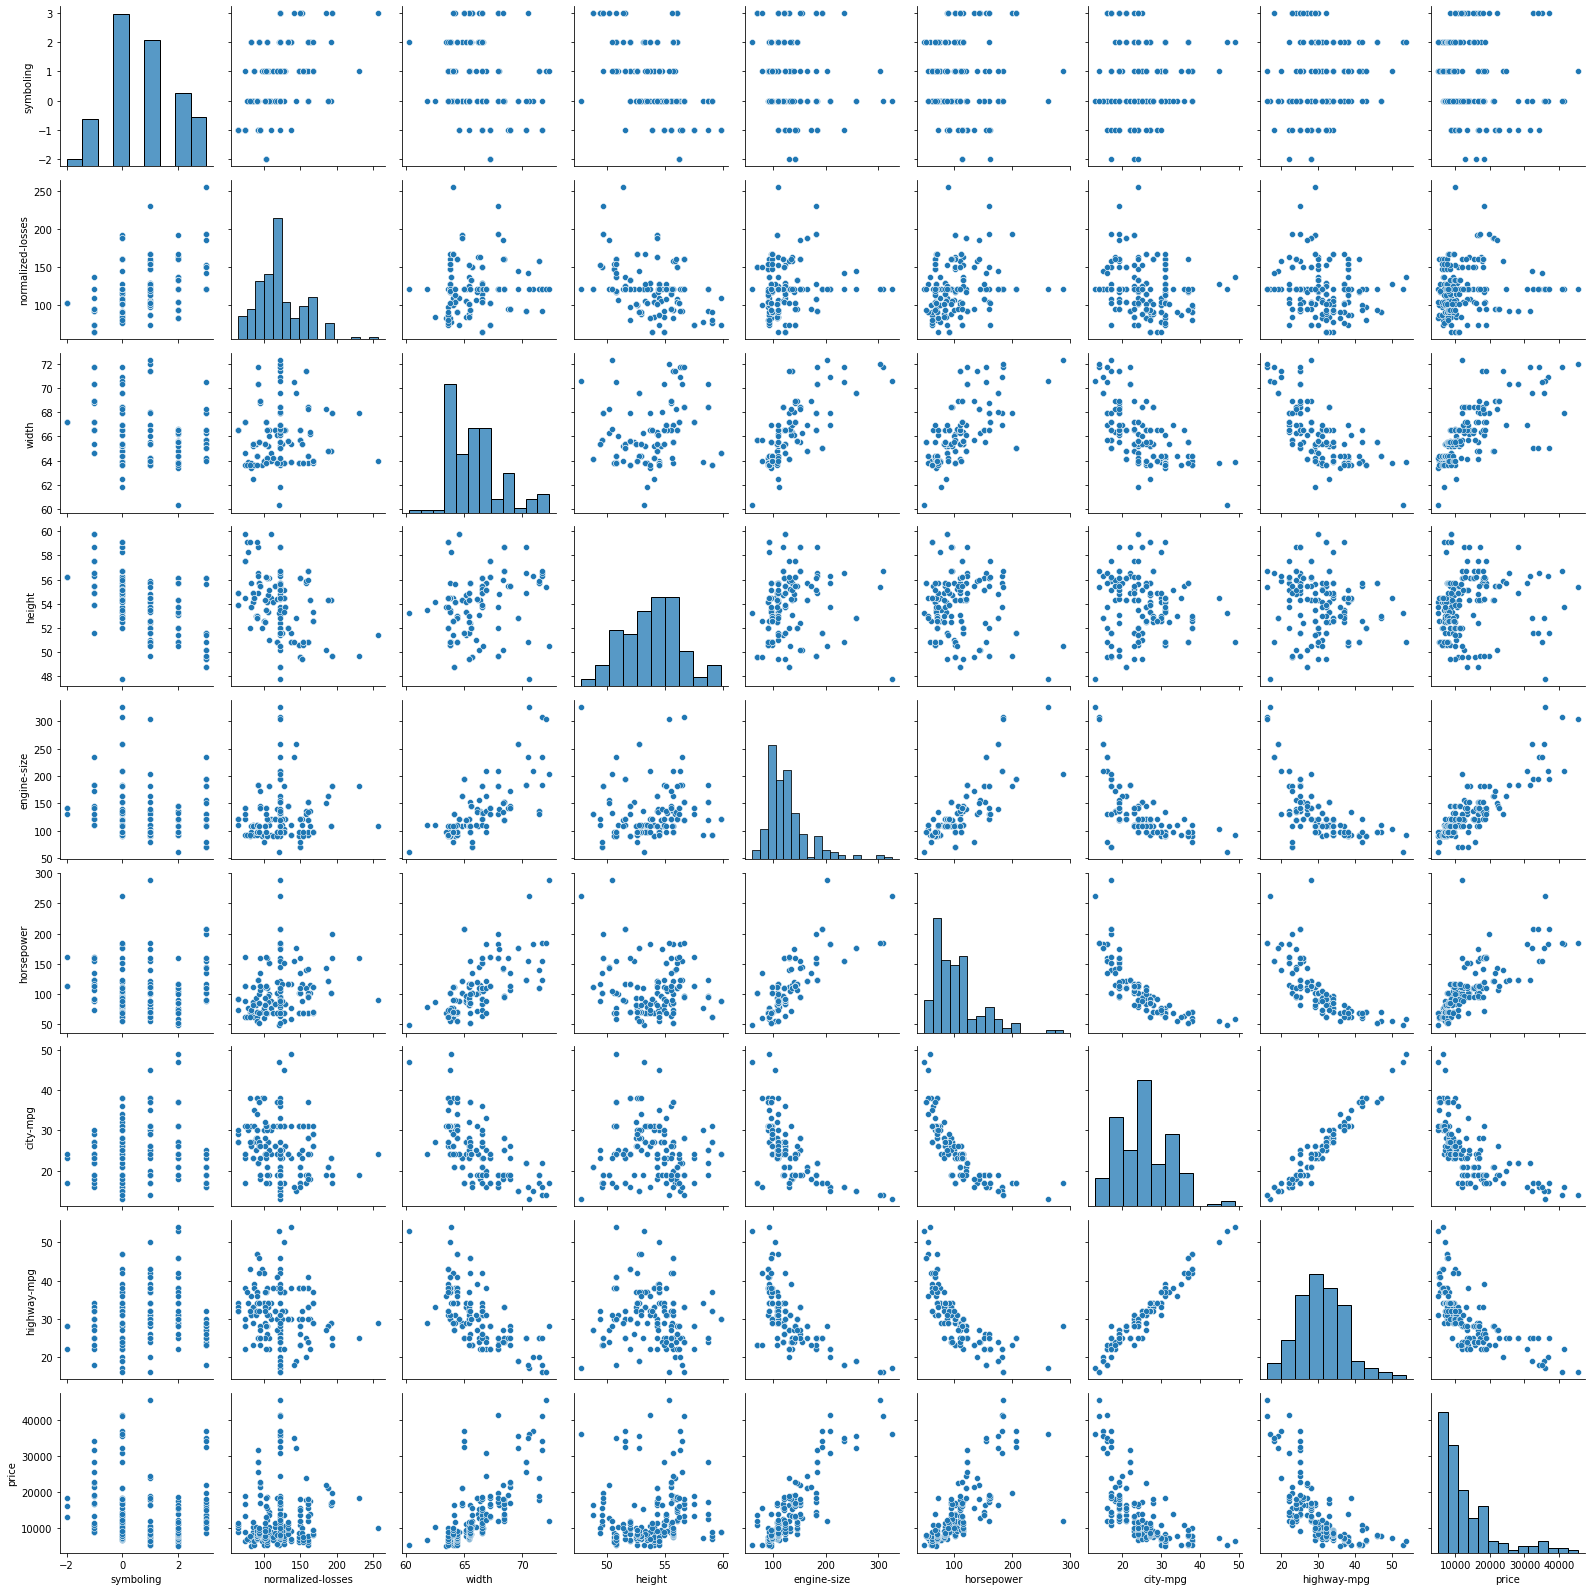

In [21]:
sns.pairplot(df)


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 194 entries, 0 to 204
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          194 non-null    int64  
 1   normalized-losses  194 non-null    float64
 2   make               194 non-null    object 
 3   fuel-type          194 non-null    object 
 4   body-style         194 non-null    object 
 5   drive-wheels       194 non-null    object 
 6   engine-location    194 non-null    object 
 7   width              194 non-null    float64
 8   height             194 non-null    float64
 9   engine-type        194 non-null    object 
 10  engine-size        194 non-null    int64  
 11  horsepower         194 non-null    float64
 12  city-mpg           194 non-null    int64  
 13  highway-mpg        194 non-null    int64  
 14  price              194 non-null    int64  
dtypes: float64(4), int64(5), object(6)
memory usage: 28.3+ KB


In [23]:
# Distinguishing the Numerical & Categorial values 
df_numerical = df.select_dtypes(['int64','float64'])
df_category = df.select_dtypes(object)

# LabelEncoding

In [24]:
from sklearn.preprocessing import LabelEncoder

for ele in df_category:
    LE = LabelEncoder()
    df_category[ele] = LE.fit_transform(df_category[ele])

In [25]:
df_category

,make,fuel-type,body-style,drive-wheels,engine-location,engine-type
0,0,1,0,2,0,0
1,0,1,0,2,0,0
2,0,1,2,2,0,5
3,1,1,3,1,0,3
4,1,1,3,0,0,3
...,...,...,...,...,...,...
200,21,1,3,2,0,3
201,21,1,3,2,0,3
202,21,1,3,2,0,5
203,21,0,3,2,0,3


In [26]:
new_df = pd.concat([df_numerical,df_category],axis=1)

In [27]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 194 entries, 0 to 204
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          194 non-null    int64  
 1   normalized-losses  194 non-null    float64
 2   width              194 non-null    float64
 3   height             194 non-null    float64
 4   engine-size        194 non-null    int64  
 5   horsepower         194 non-null    float64
 6   city-mpg           194 non-null    int64  
 7   highway-mpg        194 non-null    int64  
 8   price              194 non-null    int64  
 9   make               194 non-null    int32  
 10  fuel-type          194 non-null    int32  
 11  body-style         194 non-null    int32  
 12  drive-wheels       194 non-null    int32  
 13  engine-location    194 non-null    int32  
 14  engine-type        194 non-null    int32  
dtypes: float64(4), int32(6), int64(5)
memory usage: 23.8 KB


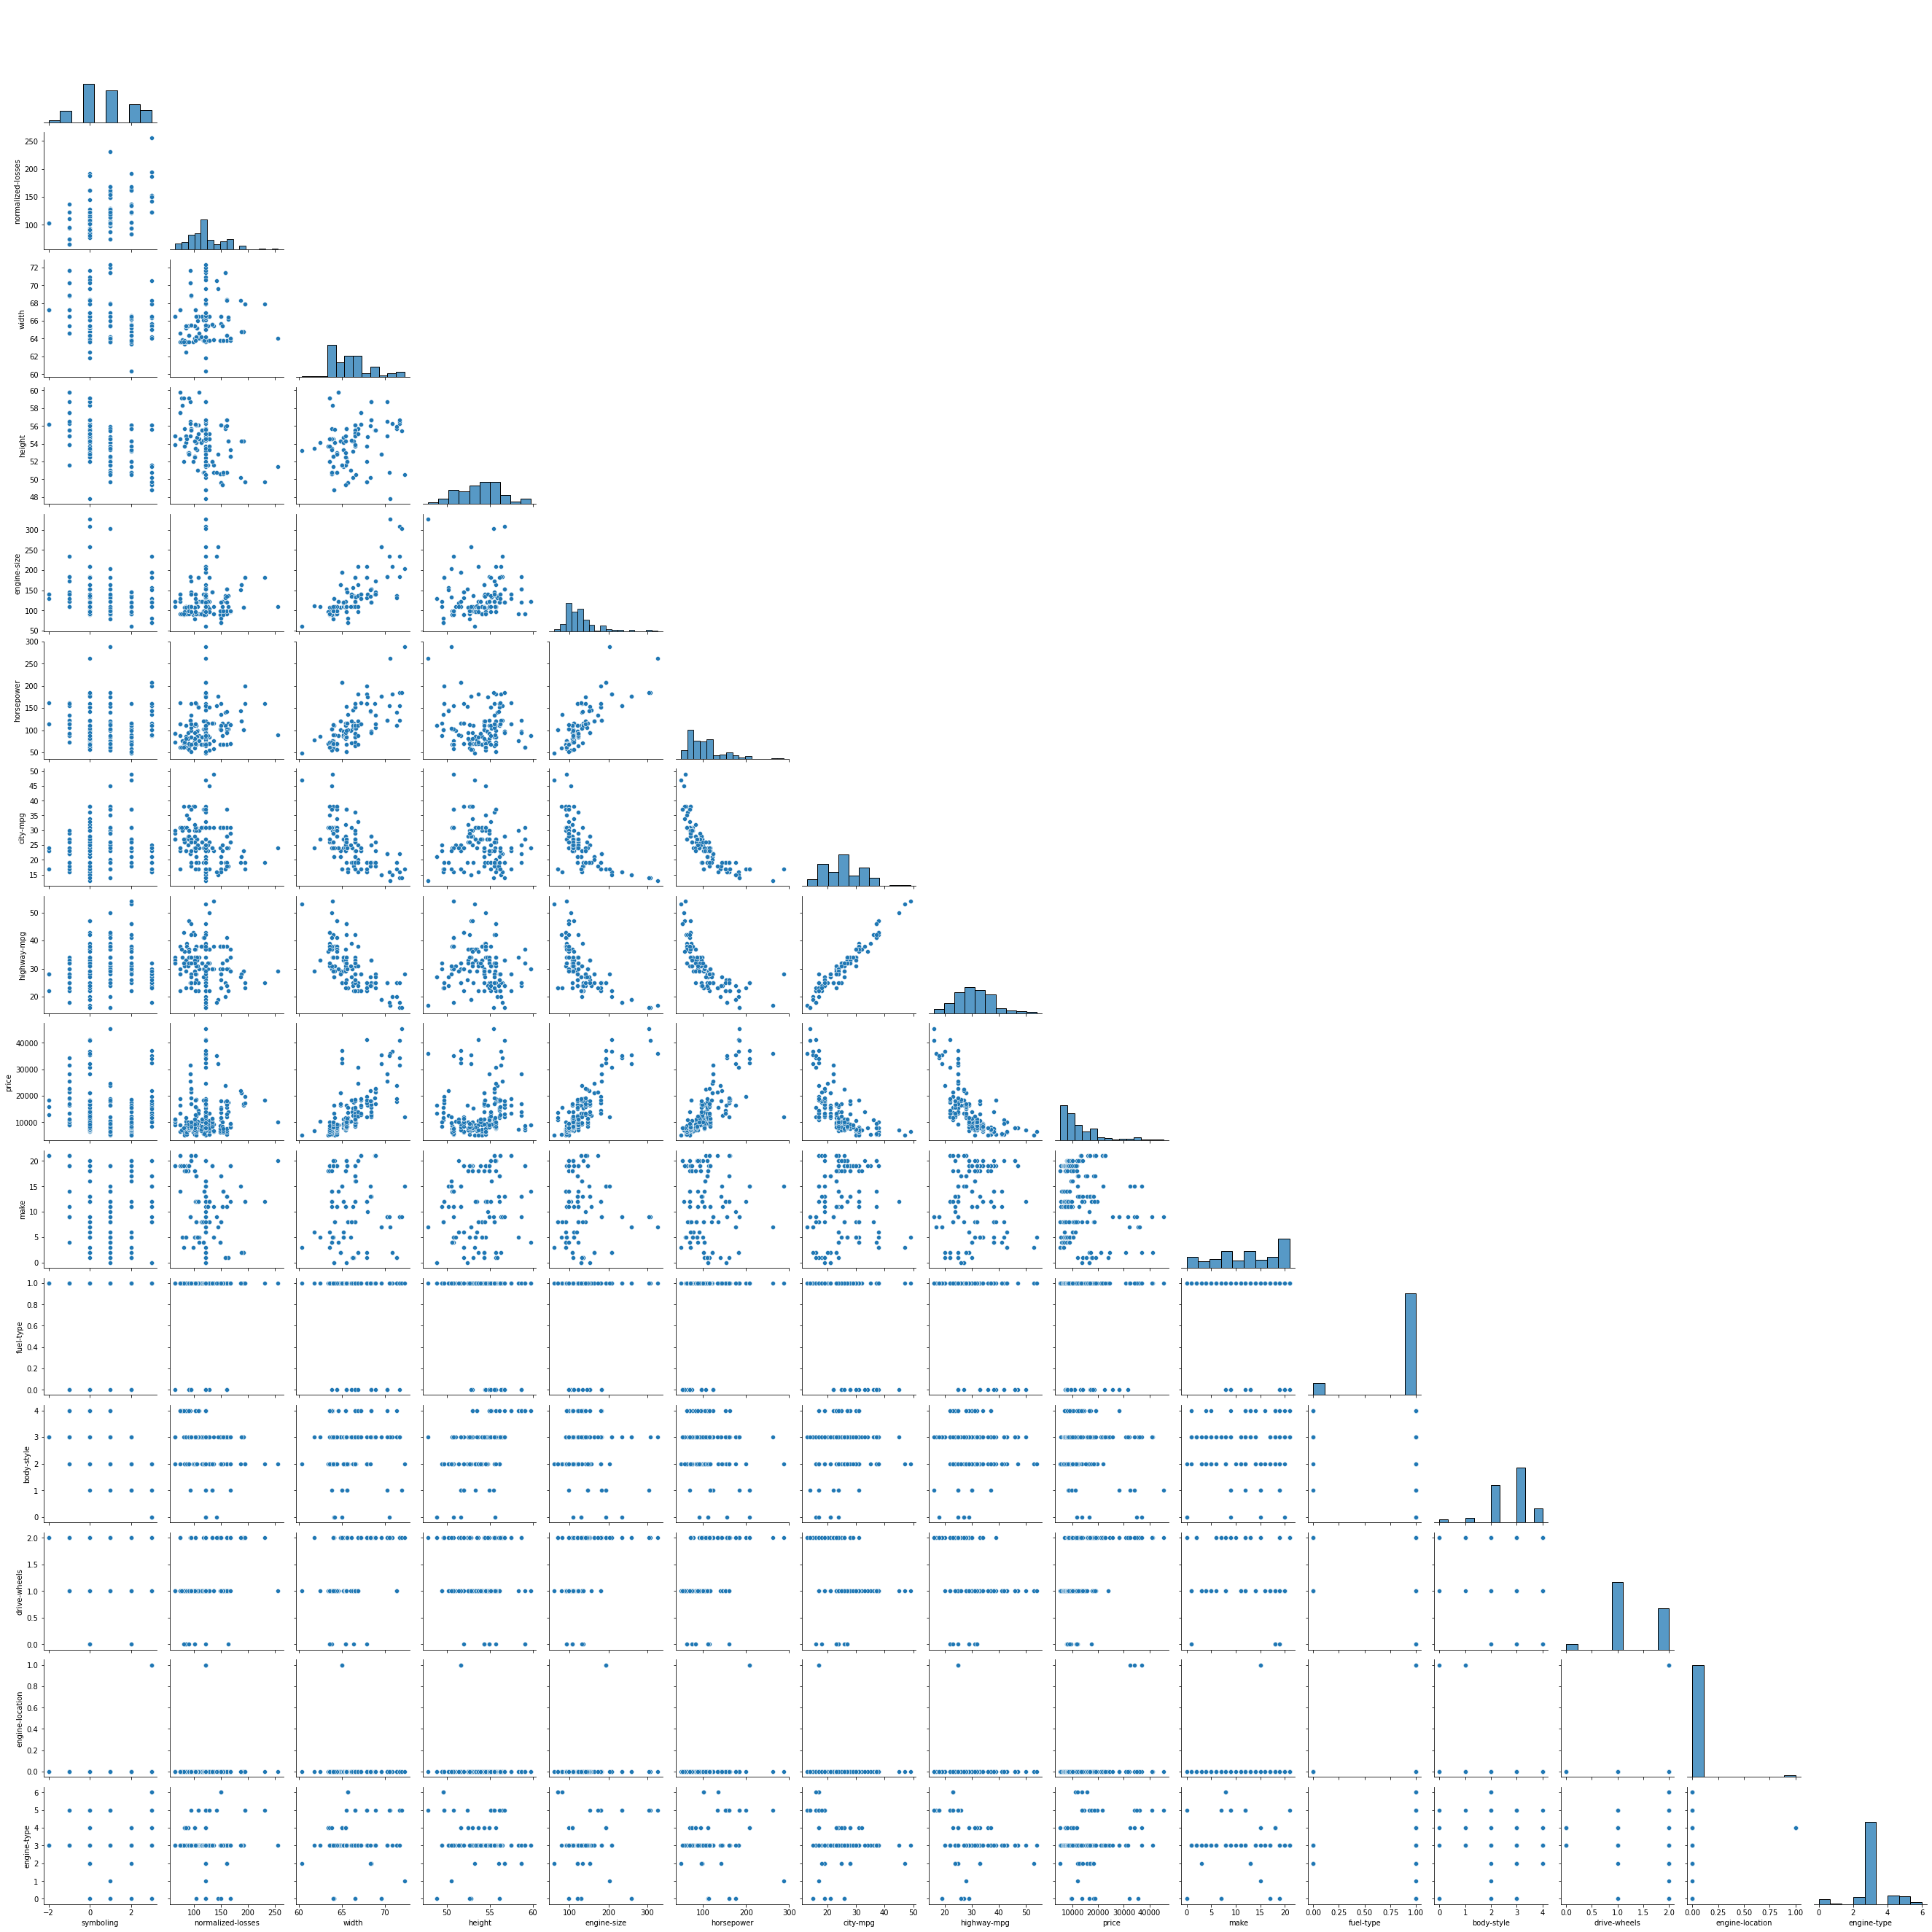

In [28]:
sns.pairplot(new_df,corner=True)

In [29]:
new_df.corr().T

,symboling,normalized-losses,width,height,engine-size,horsepower,city-mpg,highway-mpg,price,make,fuel-type,body-style,drive-wheels,engine-location,engine-type
symboling,1.000000,0.447922,-0.272388,-0.521495,-0.153671,0.027074,0.007189,0.084238,-0.095905,-0.133413,0.194923,-0.584658,-0.055088,0.231375,0.070345
normalized-losses,0.447922,1.000000,0.066622,-0.368540,0.090258,0.183385,-0.212276,-0.168904,0.129973,-0.292370,0.099052,-0.238410,0.303588,0.002392,-0.035104
width,-0.272388,0.066622,1.000000,0.296011,0.735112,0.643906,-0.641401,-0.677911,0.730503,-0.013582,-0.238744,0.145147,0.470463,-0.051210,0.048240
height,-0.521495,-0.368540,0.296011,1.000000,0.096041,-0.078245,-0.078815,-0.142926,0.147010,0.243751,-0.279480,0.574268,-0.016925,-0.114057,-0.162899
engine-size,-0.153671,0.090258,0.735112,0.096041,1.000000,0.803956,-0.642711,-0.667078,0.869638,-0.100960,-0.081435,-0.057853,0.518208,0.204366,0.109809
horsepower,0.027074,0.183385,0.643906,-0.078245,0.803956,1.000000,-0.797166,-0.761009,0.768921,-0.087388,0.155486,-0.143735,0.511362,0.334271,0.101747
city-mpg,0.007189,-0.212276,-0.641401,-0.078815,-0.642711,-0.797166,1.000000,0.970113,-0.680412,0.079432,-0.253782,0.015181,-0.448046,-0.161467,-0.152574
highway-mpg,0.084238,-0.168904,-0.677911,-0.142926,-0.667078,-0.761009,0.970113,1.000000,-0.704846,0.075333,-0.185979,-0.024926,-0.450402,-0.109265,-0.152407
price,-0.095905,0.129973,0.730503,0.147010,0.869638,0.768921,-0.680412,-0.704846,1.000000,-0.173792,-0.115791,-0.065831,0.584485,0.333620,0.102758
make,-0.133413,-0.292370,-0.013582,0.243751,-0.100960,-0.087388,0.079432,0.075333,-0.173792,1.000000,-0.119746,0.109203,-0.052044,0.057249,0.010788


In [30]:
new_df.head()

,symboling,normalized-losses,width,height,engine-size,horsepower,city-mpg,highway-mpg,price,make,fuel-type,body-style,drive-wheels,engine-location,engine-type
0,3,122.0,64.1,48.8,130,111.0,21,27,13495,0,1,0,2,0,0
1,3,122.0,64.1,48.8,130,111.0,21,27,16500,0,1,0,2,0,0
2,1,122.0,65.5,52.4,152,154.0,19,26,16500,0,1,2,2,0,5
3,2,164.0,66.2,54.3,109,102.0,24,30,13950,1,1,3,1,0,3
4,2,164.0,66.4,54.3,136,115.0,18,22,17450,1,1,3,0,0,3


In [31]:
# split X & Y
Y = new_df.price
Y

0      13495
1      16500
2      16500
3      13950
4      17450
       ...  
200    16845
201    19045
202    21485
203    22470
204    22625
Name: price, Length: 194, dtype: int64

In [32]:
arr1 = new_df.iloc[:,2:8]
arr2 = new_df.iloc[:,9:]


In [33]:
X = pd.concat([arr1,arr2],axis=1)
X

,width,height,engine-size,horsepower,city-mpg,highway-mpg,make,fuel-type,body-style,drive-wheels,engine-location,engine-type
0,64.1,48.8,130,111.0,21,27,0,1,0,2,0,0
1,64.1,48.8,130,111.0,21,27,0,1,0,2,0,0
2,65.5,52.4,152,154.0,19,26,0,1,2,2,0,5
3,66.2,54.3,109,102.0,24,30,1,1,3,1,0,3
4,66.4,54.3,136,115.0,18,22,1,1,3,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...
200,68.9,55.5,141,114.0,23,28,21,1,3,2,0,3
201,68.8,55.5,141,160.0,19,25,21,1,3,2,0,3
202,68.9,55.5,173,134.0,18,23,21,1,3,2,0,5
203,68.9,55.5,145,106.0,26,27,21,0,3,2,0,3


In [34]:
# Applying train test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.20,random_state=1)

In [35]:
# Model Building
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

In [36]:
# checking Accuarcy
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
print("r2",r2_score(y_test,y_pred))
print("mae",mean_absolute_error(y_test,y_pred))
print("mse",mean_squared_error(y_test,y_pred))
print("rmse",np.sqrt(mean_squared_error(y_test,y_pred)))

r2 0.7382296157514537
mae 3082.408342379666
mse 21642740.00989525
rmse 4652.175836089523


In [37]:
model.coef_ # Weights

array([ 8.32034511e+02,  3.57109428e+02,  8.51041370e+01,  2.89167365e+01,
       -2.01120347e+00, -6.33893835e+01, -1.38554580e+02, -5.86100775e+02,
       -3.65028601e+02,  1.38647188e+03,  1.20809191e+04,  5.79980517e+01])

In [38]:
model.intercept_  # Constant

-71414.53864511446